### 编写一个复用计算净化机 CADR 值的程序

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] #显示汉字
plt.rcParams["axes.unicode_minus"]=False
%matplotlib inline 

In [2]:
# data = pd.read_excel('/Users/lin/Desktop/CADR_python.xlsx')

## 1. 切换到采集数据文件夹所在路径位置
读取文件夹内的`.xlsx'`文件，遍历后将文件名提取

In [3]:
def load_data():
    os.chdir('/Users/lin/Desktop')
    blk = []
    blk = !ls
    raw_data = []
    for i in blk:
        if str('.xlsx') in i:
#             print(i)
            raw_data.append(i)
        else:
            None
    return raw_data

In [4]:
# load_data()
data = pd.read_excel(load_data()[0])

## 2. 基于 ['Time'] ['PM2.5'] 两列数据进行数据生成

计算公式
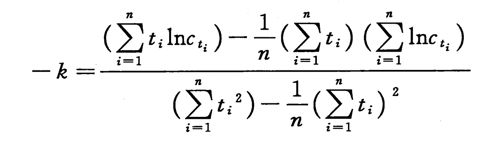

In [5]:
# 写一个简便的自然对数计算形式
def In(x):
    return math.log(x)
def transform():
    data['InCti'] = data['PM2.5'].apply(lambda x:In(x))
    data['ti'] = data['Time']
    data['ti^2'] = data['ti']*data['ti']
    data['ti_InCti'] = data['ti']*data['InCti']

    pass

transform()
sum_ti = data['ti'].sum()
sum_InCti = data['InCti'].sum()
sum_tiInCti = data['ti_InCti'].sum()
sum_ti2 = (data['ti']*data['ti']).sum()
sum_ti_2 = (data['ti'].sum())*(data['ti'].sum())
n = len(data['Time'])

# 计算 衰减常数
def attenuation_constant():
    upper = sum_tiInCti - 1/n*(sum_ti)*(sum_InCti)
    lower = sum_ti2- 1/n*(sum_ti_2)
    k = -1 * upper / lower
    return k
# 计算相关系数
def relevant_constant():
    
    upper_1 = data['ti']-1/n*data['ti'].sum()
    upper_2 = data['InCti'] - 1/n*data['InCti'].sum()                                  
    upper = math.pow((upper_1*upper_2).sum(),2)                           
    lower_1 = data['ti'] - 1/n*data['ti'].sum()
    lower_2 = data['InCti']-1/n*data['InCti'].sum()
    lower_1_2 = (lower_1*lower_1).sum()
    lower_2_2 = (lower_2*lower_2).sum()                              
    lower = lower_1_2*lower_2_2
    R_2 = upper / lower
    return R_2

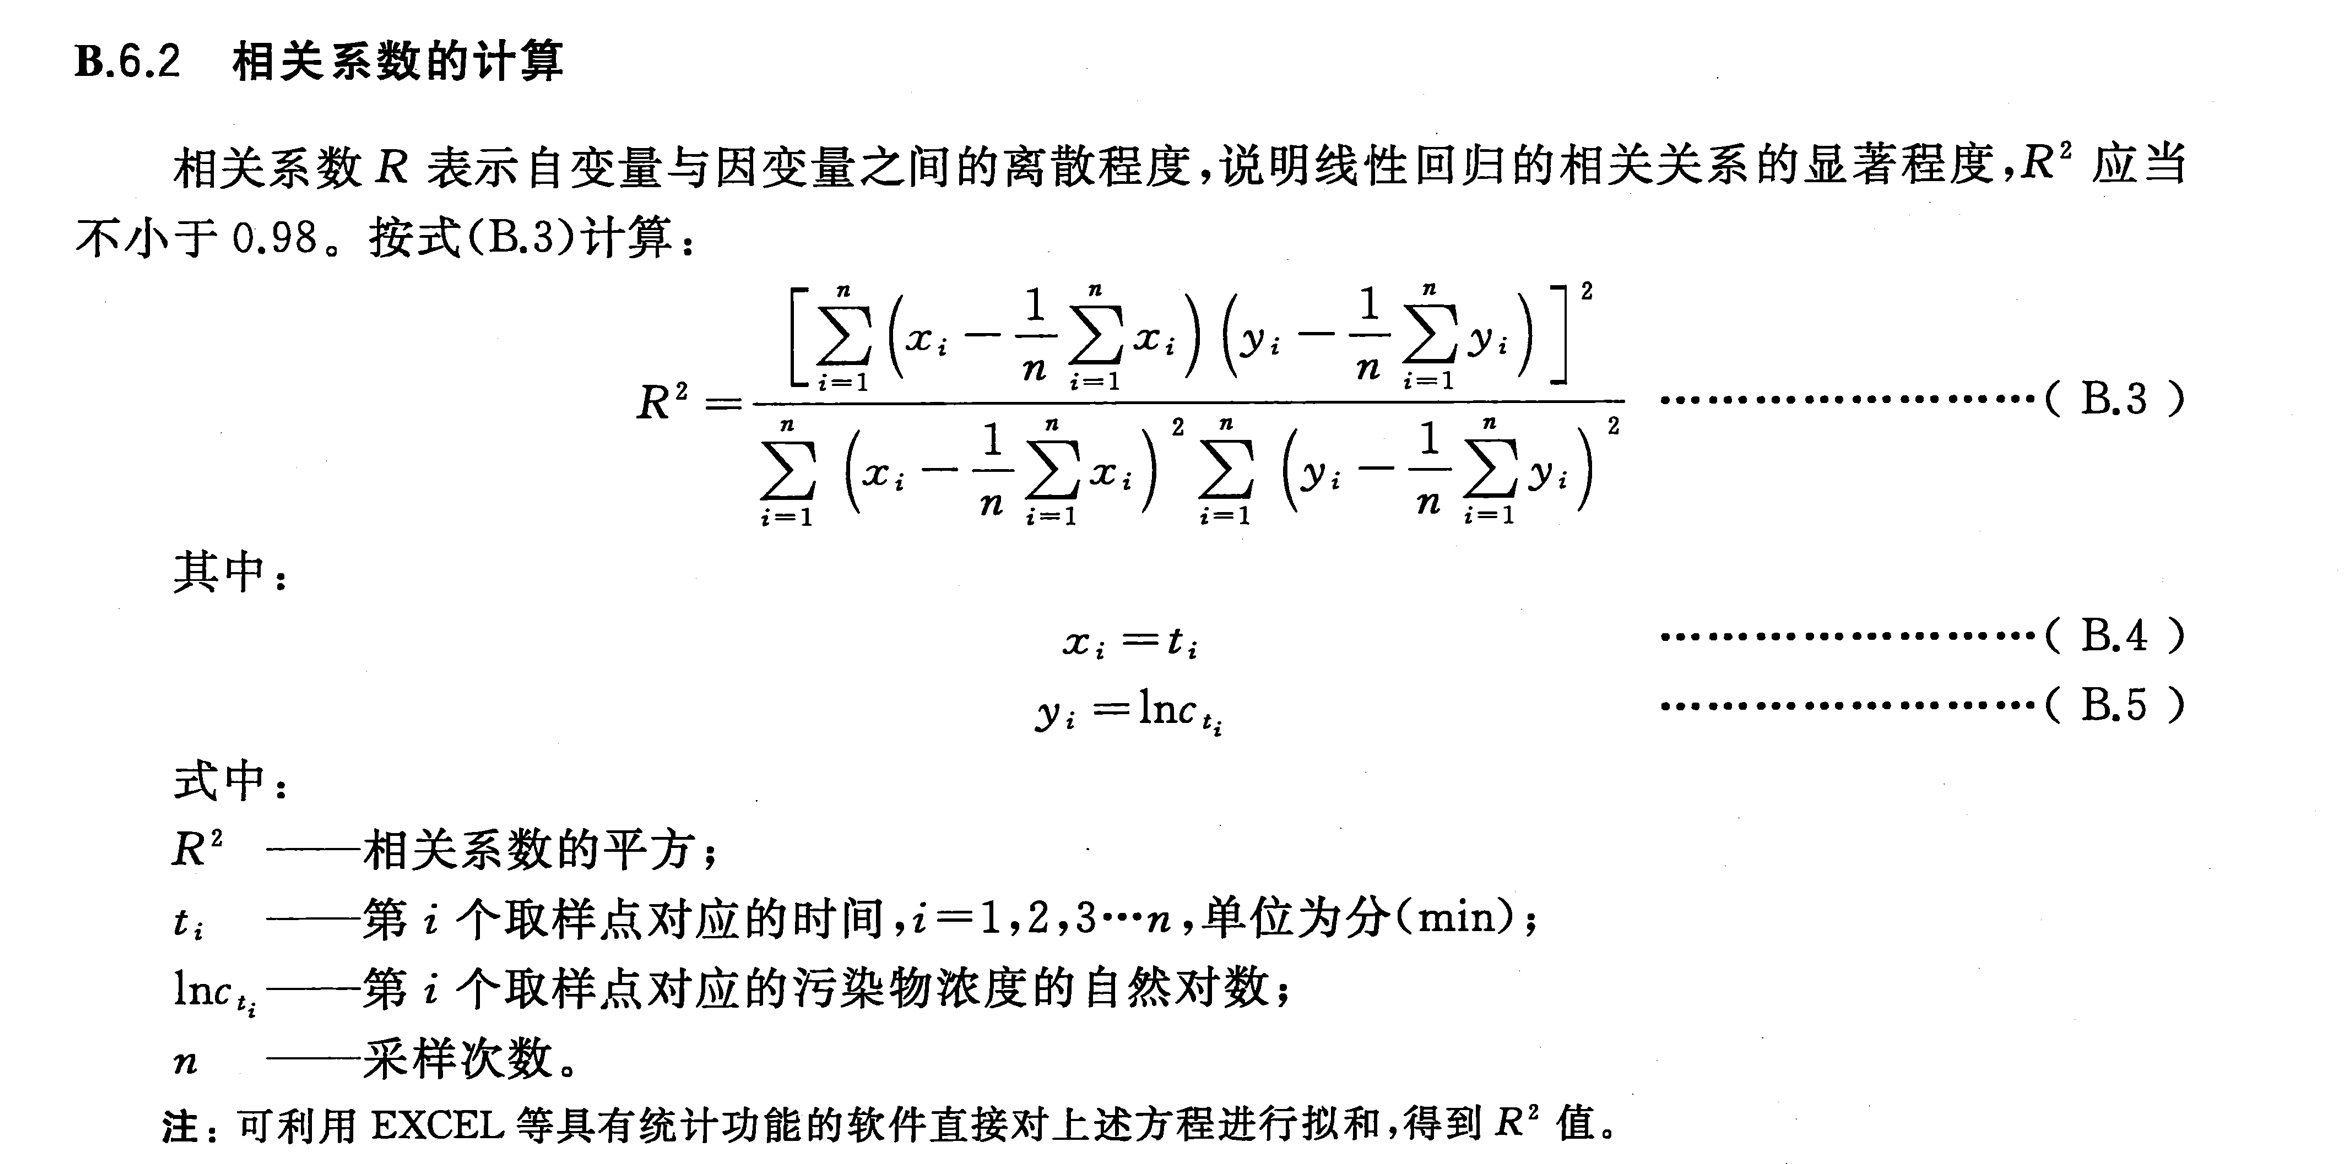

## 3. 洁净空气量 CADR 的计算
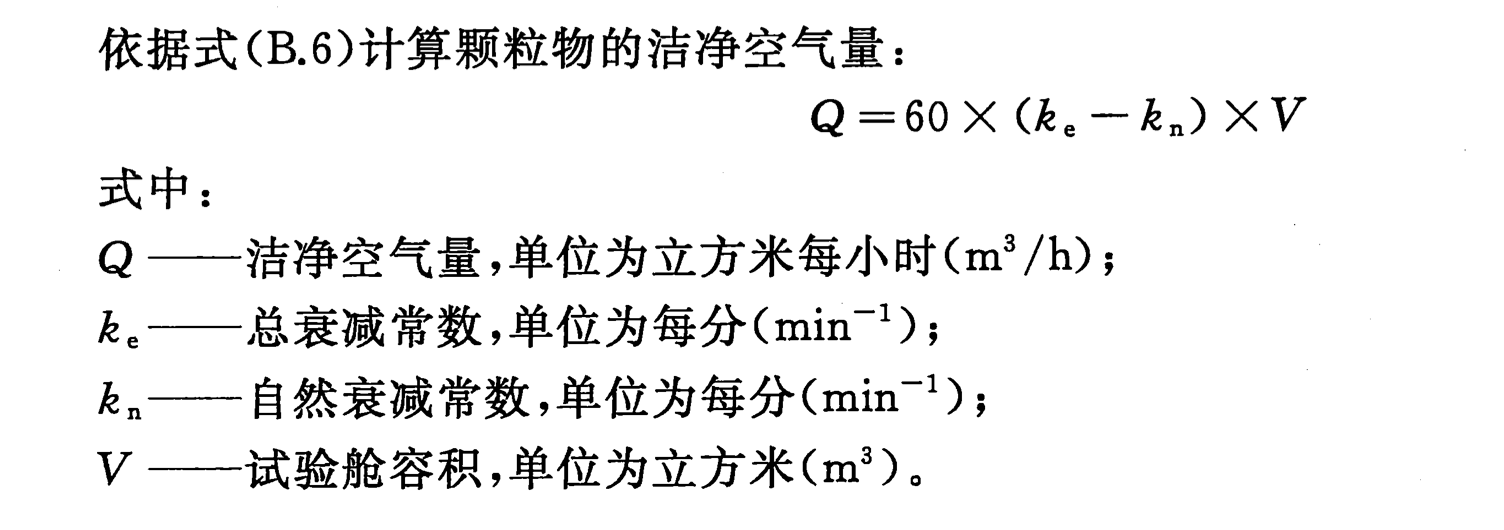

In [11]:
print('总衰减常数为：{}'.format(attenuation_constant()))
print('相关系数为：{}'.format(relevant_constant()))

总衰减常数为：0.023991671360255526
相关系数为：0.9949834733765586


## 4. 作图

Text(0.5,1,'变化趋势线')

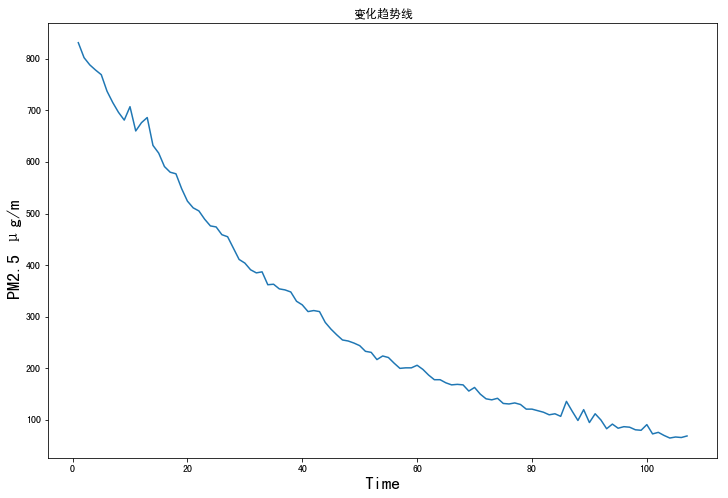

In [12]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data['Time'],y=data['PM2.5'])
plt.xlabel('Time',fontsize=18)
plt.ylabel('PM2.5 μg/m³',fontsize=18)
# plt.legend()
plt.title('变化趋势线')

In [13]:
kn = input('请输入自然沉降系数： ')

请输入自然沉降系数： 


In [14]:
print(kn)

Text(0.5,1,'变化趋势线')

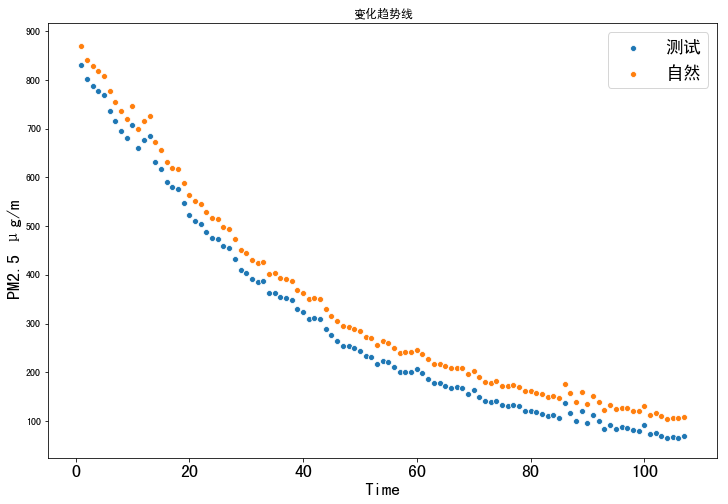

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['Time'],y=data['PM2.5'], label='测试')
sns.scatterplot(x=data['Time'],y=data['PM2.5']+40,label='自然')
plt.xticks(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('PM2.5 μg/m³',fontsize=18)
plt.legend(fontsize=18)
plt.title('变化趋势线')